# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [2]:
import matplotlib.pyplot as plt
#import csv actually gonna use pandas on this one
import pandas as pd
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [3]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
#lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here

data = pd.read_csv(filename)
print(data.columns)


Index(['km', 'year', 'powerPS', 'avgPrice'], dtype='object')


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [4]:
# linear regression with linregress (estimate price from year)

spreg_year = stats.linregress(data['year'].values,data['avgPrice'].values)
print('R-score squared from Scipy: ',spreg_year.rvalue**2)

R-score squared from Scipy:  0.4579287325240121


In [5]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

skreg = linear_model.LinearRegression().fit(data['year'].values.reshape(-1,1),data['avgPrice'].values.reshape(-1,1))
print("R-score squared from SKLearn: ",skreg.score(data['year'].values.reshape(-1,1),data['avgPrice'].values.reshape(-1,1)))


R-score squared from SKLearn:  0.457928732524013


In [6]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

x_year = data['year'].values
y = data['avgPrice'].values
N = x_year.size
if N != y.size: print("Different x and y sample size!")

# formulas from least square method
m = (N*np.dot(x_year,y)-np.sum(x_year)*np.sum(y))/(N*np.sum(x_year**2) - (np.sum(x_year))**2 )
q = (np.sum(y)*np.sum(x_year**2) - np.sum(x_year)*np.dot(x_year,y) )/(N*np.sum(x_year**2) - (np.sum(x_year))**2 )

# calculate r

y_pred = x_year*m + q

rsquared_manual = 1 - np.sum((y_pred-y)**2)/np.sum((y-np.mean(y))**2)
                                        
print('Manual R-squared score: ',rsquared_manual)

Manual R-squared score:  0.457928732524013


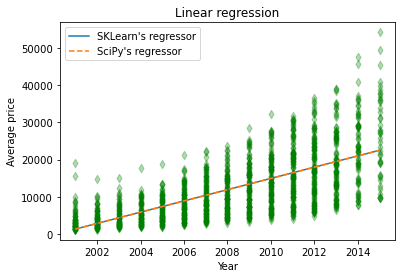

In [7]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

fig,ax1 = plt.subplots()
ax1.scatter(x_year,y, marker='d',alpha = 0.3,color='green')
ax1.plot(x_year,skreg.predict(x_year.reshape(-1,1)),label="SKLearn's regressor")

y_sp = x_year*spreg_year.slope + spreg_year.intercept
ax1.plot(x_year,y_sp,linestyle='--',label="SciPy's regressor")
ax1.set_title("Linear regression")
ax1.set_ylabel('Average price')
ax1.set_xlabel('Year')
ax1.legend()


plt.show()



R-score squared from Scipy:  0.5020431471760587


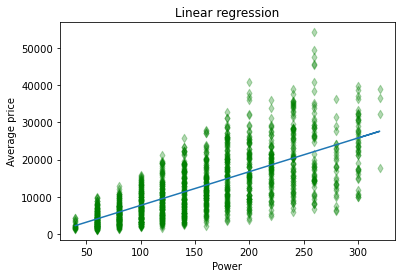

In [8]:
# linear regression with linregress (estimate price from power)

spreg_power = stats.linregress(data['powerPS'].values,data['avgPrice'].values)
print('R-score squared from Scipy: ',spreg_power.rvalue**2)



fig,ax = plt.subplots()
ax.scatter(data['powerPS'].values,data['avgPrice'].values,marker='d',alpha = 0.3,color='green')
ax.plot(data['powerPS'].values,(data['powerPS'].values*spreg_power.slope + spreg_power.intercept))
ax.set_title("Linear regression")
ax.set_ylabel('Average price')
ax.set_xlabel('Power')
plt.show()

R-score squared from Scipy:  0.06619646812295613


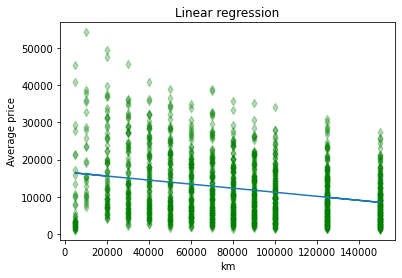

In [9]:
# linear regression with linregress (estimate price from km)

spreg_km = stats.linregress(data['km'].values,data['avgPrice'].values)
print('R-score squared from Scipy: ',spreg_km.rvalue**2)



fig,ax = plt.subplots()
ax.scatter(data['km'].values,data['avgPrice'].values,marker='d',alpha = 0.3,color='green')
ax.plot(data['km'].values,(data['km'].values*spreg_km.slope + spreg_km.intercept))
ax.set_title("Linear regression")
ax.set_ylabel('Average price')
ax.set_xlabel('km')
plt.show()

In [10]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print("Year's correlation coefficient: ",spreg_year.rvalue**2)
print("Power's correlation coefficient: ",spreg_power.rvalue**2)
print("KM's correlation coefficient: ",spreg_km.rvalue**2)

Year's correlation coefficient:  0.4579287325240121
Power's correlation coefficient:  0.5020431471760587
KM's correlation coefficient:  0.06619646812295613


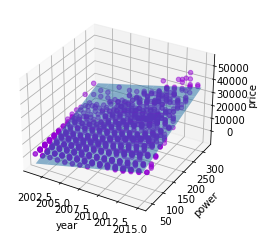

2d regressor R-score:  0.8491518804322795


In [36]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)

skreg_3d = linear_model.LinearRegression().fit(data[['year','powerPS']].values, data['avgPrice'].values.reshape(-1,1))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x_plot = np.linspace(data['year'].min(),data['year'].max(),10)
y_plot = np.linspace(data['powerPS'].min(),data['powerPS'].max(),10)


X_plot,Y_plot = np.meshgrid(x_plot,y_plot)
Z=skreg_3d.coef_[0][0]*X_plot + skreg_3d.coef_[0][1]*Y_plot + skreg_3d.intercept_

surf = ax.plot_surface(X_plot, Y_plot, Z,alpha=0.5)
scatter = ax.scatter(data['year'],data['powerPS'],data['avgPrice'],color='darkviolet',alpha=0.5)

ax.set_xlabel('year')
ax.set_ylabel('power')
ax.set_zlabel('price')

plt.show()

print("2d regressor R-score: ", skreg_3d.score(data[['year','powerPS']].values, data['avgPrice'].values.reshape(-1,1)))
